### Ade Edwin Mbony
### 19CJ025758
### CEN524 Module 4a Assignment 2

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

### Load dataset and split

In [2]:
cancer_data = load_breast_cancer()

In [3]:
print(cancer_data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [7]:
X = cancer_data.data
y = cancer_data.target.astype(int)

In [8]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
y[0]

0

In [10]:
X_train, X_tv, Y_train, Y_tv = train_test_split(X, y, test_size=0.2)

In [11]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_tv, Y_tv, test_size=0.5)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [13]:
len(X_train), len(X_test)

(455, 57)

In [14]:
len(Y_train), len(Y_test)

(455, 57)

### Train the model

In [15]:
N, D = X_train.shape
N, D

(455, 30)

In [16]:
K = 1

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((D,)),
    tf.keras.layers.Dense(K, activation="sigmoid")
])

In [20]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [21]:
r = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1926 - loss: 1.1195 - val_accuracy: 0.2281 - val_loss: 1.0361
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2566 - loss: 0.9588 - val_accuracy: 0.2982 - val_loss: 0.9178
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3030 - loss: 0.8773 - val_accuracy: 0.4211 - val_loss: 0.8124
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4729 - loss: 0.7590 - val_accuracy: 0.5263 - val_loss: 0.7228
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5646 - loss: 0.6920 - val_accuracy: 0.7018 - val_loss: 0.6480
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6759 - loss: 0.6141 - val_accuracy: 0.7719 - val_loss: 0.5857
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7645 - loss: 0.5578 - val_accuracy: 0.7895 - val_loss: 0.5357
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8112 - loss: 0.5211 - val_accuracy: 0.8246 - 

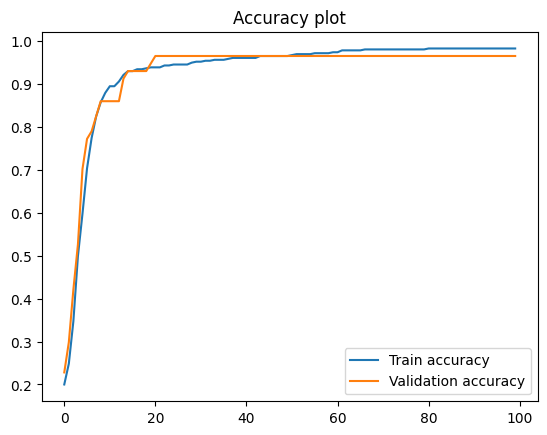

In [22]:
plt.plot(r.history["accuracy"], label="Train accuracy")
plt.plot(r.history["val_accuracy"], label="Validation accuracy")
plt.title("Accuracy plot")
plt.legend();

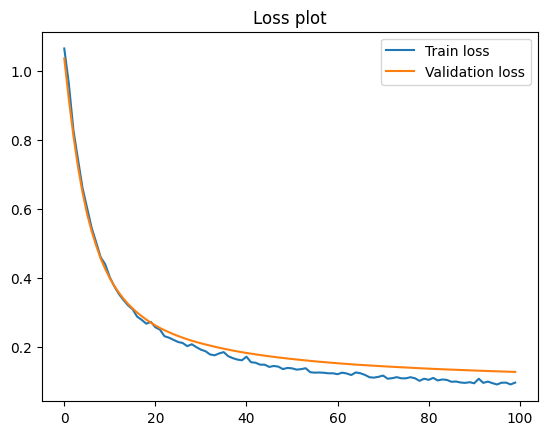

In [23]:
plt.plot(r.history["loss"], label="Train loss")
plt.plot(r.history["val_loss"], label="Validation loss")
plt.title("Loss plot")
plt.legend();

In [24]:
print(f"Train classification rate: {r.history['accuracy'][-1]*100:.02f}%")

Train classification rate: 98.24%


In [25]:
print(f"Train loss: {r.history['loss'][-1]}%")

Train loss: 0.09627553820610046%


In [26]:
evaluation = model.evaluate(X_test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9766 - loss: 0.1026 


In [27]:
print(f"Test classification rate: {evaluation[1] * 100:.02f}%")

Test classification rate: 96.49%


In [28]:
print(f"Test loss: {evaluation[0]}")

Test loss: 0.1111932098865509


In [29]:
Y_pred = np.round(model.predict(X_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [30]:
confusion_matrix = confusion_matrix(Y_pred, Y_test) 

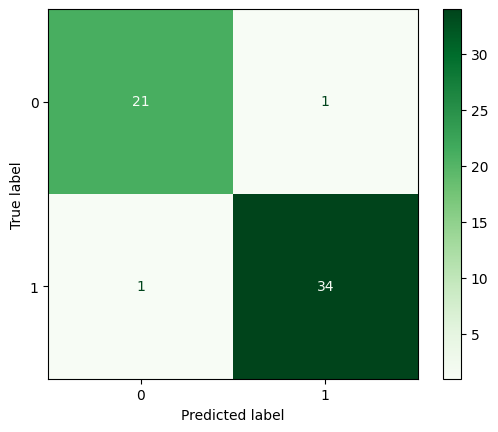

In [31]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
cm_display.plot(cmap="Greens");

In [32]:
model.save("module4a.keras")